# Predicting Nurse Stress Levels Using Wearable Sensor Data

#### 2200930_CE888_Assignment_02

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sb
import glob 
import os
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

 4 scripts is shared by Professor and author of paper 
With the help of scripts I have unzip,merge,combined and labelled the data individually of 15 nurses 

## Importing 5 nurses labelled datasets 

Importing (5C,6D,7A,7E,F5) nurses datasets to use train the model 

In [125]:
nurse_5C = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_5C/label_5C_final.csv")
nurse_6D = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_6D/label_6D_final.csv")
nurse_7A = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_7A/label_7A_final.csv")
nurse_7E = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_7E/label_7E_final.csv")
nurse_F5 = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_F5/label_F5_final.csv")

nurse_train = pd.concat([nurse_5C, nurse_6D, nurse_7A, nurse_7E, nurse_F5,], axis=0, keys=['nurse_5C', 'nurse_6D', 'nurse_7A', 'nurse_7E', 'nurse_F5'])
nurse_train = nurse_train.reset_index(drop=True)
nurse_train.drop(columns = 'id',inplace = True)
nurse_train.drop(columns = 'datetime',inplace = True)

In [126]:
nurse_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939586 entries, 0 to 2939585
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   X       float64
 1   Y       float64
 2   Z       float64
 3   EDA     float64
 4   HR      float64
 5   TEMP    float64
 6   label   float64
dtypes: float64(7)
memory usage: 157.0 MB


In [127]:
nurse_train.shape

(2939586, 7)

 - Checking null values 

In [128]:
nurse_train.isnull().any()

X        False
Y        False
Z        False
EDA      False
HR       False
TEMP     False
label    False
dtype: bool

- Train Data set 

In [129]:
nurse_train_set = nurse_train.drop(columns = 'label')
stress = nurse_train.label

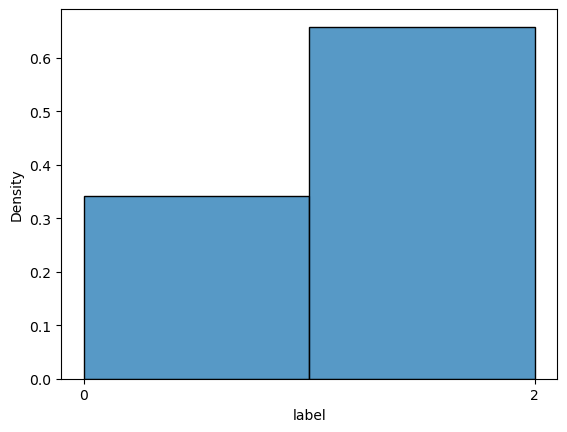

In [130]:
sns.histplot(data=nurse_train, x='label', bins=[0,1,2], stat='density')
plt.xticks([0, 2])
plt.ylabel('Density')
plt.show()

## Importing 2 nurses labelled datasets

- Importing (15,83) nurses datasets to use as test in the model

In [131]:
nurse_15 = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_15/label_15_final.csv")
nurse_83 = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_83/label_83_final.csv")
nurse_test = pd.concat([nurse_15, nurse_83], axis=0, keys=['nurse_15', 'nurse_83'])
nurse_test = nurse_test.reset_index(drop=True)
nurse_test.drop(columns = 'id',inplace = True)
nurse_test.drop(columns = 'datetime',inplace = True)
nurse_test

,X,Y,Z,EDA,HR,TEMP,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,2.0
...,...,...,...,...,...,...,...
1681945,-67.0,6.0,4.0,2.843508,86.92,35.21,2.0
1681946,-65.0,5.0,3.0,2.843508,86.92,35.21,2.0
1681947,-62.0,7.0,2.0,2.843508,86.92,35.21,2.0
1681948,-64.0,7.0,4.0,2.843508,86.92,35.21,2.0


- Test Data 

In [132]:
X_test = nurse_test.drop(columns = 'label')
y_test = nurse_test.label

### Model Implementing 

- RandomForestClassifier

In [133]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=15)
model1 = rfc.fit(nurse_train_set,stress.values.ravel())
pred1 = rfc.predict(X_test)
accuracy_RFC = accuracy_score(y_test, pred1)
print("Accuracy: {:.2f}%".format(accuracy_RFC * 100))

Accuracy: 86.65%


 - KNeighborsClassifier

In [134]:
knn = KNeighborsClassifier(n_neighbors=5)
model2 = knn.fit(nurse_train_set, stress)
pred2 = knn.predict(X_test)
accuracy_KNN = accuracy_score(y_test, pred2)
print("Accuracy: {:.2f}%".format(accuracy_KNN * 100))

Accuracy: 84.51%


- LogisticRegression

In [136]:
lr = LogisticRegression(solver='liblinear', random_state=0)
model3 = lr.fit(nurse_train_set, stress)
pred4 = lr.predict(X_test)
accuracy_LR = accuracy_score(y_test, pred4)
print("Accuracy: {:.2f}%".format(accuracy_LR * 100))

Accuracy: 89.49%


- GaussianNB

In [137]:
gnb = GaussianNB()
model4 = gnb.fit(nurse_train_set, stress)
pred6 = gnb.predict(X_test)
accuracy_GNB = accuracy_score(y_test, pred6)
print("Accuracy: {:.2f}%".format(accuracy_GNB * 100))

Accuracy: 85.89%


#### Checking the best model 

In [139]:
results = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'KNN', 'LogisticRegression', 'GaussianNB'],
    'Score': [accuracy_RFC*100, accuracy_KNN*100, accuracy_LR*100, accuracy_GNB*100]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
print(result_df)


                            Score
Model                            
LogisticRegression      89.488808
RandomForestClassifier  86.649128
GaussianNB              85.886976
KNN                     84.514284


### Scaling data

In [145]:
scaler = MinMaxScaler()
nurse_train_set_scaled = scaler.fit_transform(nurse_train_set)
X_test_scaled = scaler.transform(X_test)
lr_hyper = LogisticRegression(solver='liblinear', random_state=0)
lr_hyper.fit(nurse_train_set_scaled, stress)
pred_hyper = lr_hyper.predict(X_test_scaled)
accuracy_hyper = accuracy_score(y_test, pred_hyper)
print("Accuracy: {:.2f}%".format(accuracy_hyper*100))

Accuracy: 89.49%


### Cross Validation 

Performing cross validation on different Test data or nurse(E4) using first and last models (LogisticRegression,KNN)

In [146]:
nurse_E4 = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_E4/label_E4_final.csv")
nurse_E4

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-10.0,59.0,13.0,4.184706,113.40,34.99,E4,2020-04-18 20:32:00.000000000,2.0
1,-12.0,61.0,12.0,4.184706,113.40,34.99,E4,2020-04-18 20:32:00.031249920,2.0
2,-11.0,62.0,13.0,4.184706,113.40,34.99,E4,2020-04-18 20:32:00.062500096,2.0
3,-14.0,62.0,13.0,4.184706,113.40,34.99,E4,2020-04-18 20:32:00.093750016,2.0
4,-16.0,61.0,13.0,4.184706,113.40,34.99,E4,2020-04-18 20:32:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
1472505,-40.0,43.0,16.0,1.026040,80.08,31.27,E4,2020-07-06 19:05:59.875000064,2.0
1472506,-38.0,44.0,16.0,1.026040,80.08,31.27,E4,2020-07-06 19:05:59.906249984,2.0
1472507,-38.0,45.0,12.0,1.026040,80.08,31.27,E4,2020-07-06 19:05:59.937499904,2.0
1472508,-41.0,47.0,11.0,1.026040,80.08,31.27,E4,2020-07-06 19:05:59.968750080,2.0


In [147]:
nurse_E4.drop(columns = 'id',inplace = True)
nurse_E4.drop(columns = 'datetime',inplace = True)
nurse_E4

,X,Y,Z,EDA,HR,TEMP,label
0,-10.0,59.0,13.0,4.184706,113.40,34.99,2.0
1,-12.0,61.0,12.0,4.184706,113.40,34.99,2.0
2,-11.0,62.0,13.0,4.184706,113.40,34.99,2.0
3,-14.0,62.0,13.0,4.184706,113.40,34.99,2.0
4,-16.0,61.0,13.0,4.184706,113.40,34.99,2.0
...,...,...,...,...,...,...,...
1472505,-40.0,43.0,16.0,1.026040,80.08,31.27,2.0
1472506,-38.0,44.0,16.0,1.026040,80.08,31.27,2.0
1472507,-38.0,45.0,12.0,1.026040,80.08,31.27,2.0
1472508,-41.0,47.0,11.0,1.026040,80.08,31.27,2.0


In [148]:
X_test_E4 = nurse_E4.drop(columns = 'label')
y_test_E4 = nurse_E4.label
y_test_E4

0          2.0
1          2.0
2          2.0
3          2.0
4          2.0
          ... 
1472505    2.0
1472506    2.0
1472507    2.0
1472508    2.0
1472509    2.0
Name: label, Length: 1472510, dtype: float64

In [150]:
pred_E4 = model3.predict(X_test_E4)
accuracy_E4 = accuracy_score(y_test_E4,pred_E4)
print("Accuracy: {:.2f}%".format(accuracy_E4 * 100))

Accuracy: 85.35%


In [151]:
pred_E4_KNN = model2.predict(X_test_E4)

accuracy_KNN_E4 = accuracy_score(y_test_E4, pred_E4_KNN)
print("Accuracy: {:.2f}%".format(accuracy_KNN_E4*100))

Accuracy: 81.49%


In [152]:
nurse_BG = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_BG/label_BG_final.csv")
nurse_BG.drop(columns = 'id',inplace = True)
nurse_BG.drop(columns = 'datetime',inplace = True)

In [153]:
nurse_BG

,X,Y,Z,EDA,HR,TEMP,label
0,12.0,56.0,28.0,0.179642,88.97,32.16,2.0
1,12.0,55.0,28.0,0.179642,88.97,32.16,2.0
2,11.0,56.0,28.0,0.179642,88.97,32.16,2.0
3,12.0,56.0,28.0,0.179642,88.97,32.16,2.0
4,12.0,55.0,28.0,0.179642,88.97,32.16,2.0
...,...,...,...,...,...,...,...
608650,-33.0,-8.0,54.0,0.275387,99.93,32.45,2.0
608651,-33.0,-8.0,55.0,0.275387,99.93,32.45,2.0
608652,-33.0,-7.0,55.0,0.275387,99.93,32.45,2.0
608653,-34.0,-7.0,55.0,0.275387,99.93,32.45,2.0


In [154]:
X_test_BG = nurse_BG.drop(columns = 'label')
y_test_BG = nurse_BG.label

In [155]:
nurse_BG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608655 entries, 0 to 608654
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X       608655 non-null  float64
 1   Y       608655 non-null  float64
 2   Z       608655 non-null  float64
 3   EDA     608655 non-null  float64
 4   HR      608655 non-null  float64
 5   TEMP    608655 non-null  float64
 6   label   608655 non-null  float64
dtypes: float64(7)
memory usage: 32.5 MB


In [156]:
nurse_BG.isna().sum()

X        0
Y        0
Z        0
EDA      0
HR       0
TEMP     0
label    0
dtype: int64

In [157]:
pred_BG = model3.predict(X_test_BG)
accuracy_BG = accuracy_score(y_test_BG,pred_BG)
print("Accuracy: {:.2f}%".format(accuracy_BG*100))

Accuracy: 93.30%


In [ ]:
pred_BG_KNN = model2.predict(X_test_BG)

accuracy_KNN_BG = accuracy_score(y_test_BG, pred_BG_KNN)
print("Accuracy: {:.2f}%".format(accuracy_KNN_BG*100))

### Cross validating with DF nurse dataset which contains null values 

In [159]:
nurse_DF = pd.read_csv("C:/Users/Revati/OneDrive/Desktop/DSDM/Final_merged_file/merged_data_DF/label_DF_final.csv")
nurse_DF.drop(columns='id', inplace=True)
nurse_DF.drop(columns='datetime', inplace=True)

In [160]:
nurse_DF.isnull().sum()

X              0
Y              0
Z              0
EDA            0
HR             0
TEMP           0
label    1089003
dtype: int64

In [161]:
test_data = nurse_DF[nurse_DF['label'].isna()]
fill_one = test_data.fillna(1)
fill_zero = test_data.fillna(0)

In [162]:
X_test_DF = test_data.drop(columns = 'label')
y_test_DF_one = fill_one.label
y_test_DF_zero = fill_zero.label

In [163]:
pred_DF = model3.predict(X_test_DF)
accuracy_DF = accuracy_score(y_test_DF_one,pred_DF)
print("Accuracy: {:.2f}%".format(accuracy_DF*100))

Accuracy: 0.0


In [164]:
pred_DF = model3.predict(X_test_DF)
accuracy_DF = accuracy_score(y_test_DF_zero,pred_DF)
print("Accuracy: {:.2f}%".format(accuracy_DF*100))

Accuracy: 81.25%


## Feature selection 

Selecting features from model1 which is giving me accuracy 

In [118]:
importance_df = pd.DataFrame({
    'feature': nurse_train_set.columns,
    'importance': model1.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(20)

,feature,importance
3,EDA,0.412582
5,TEMP,0.371536
4,HR,0.066120
2,Z,0.061427
1,Y,0.047232
0,X,0.041103


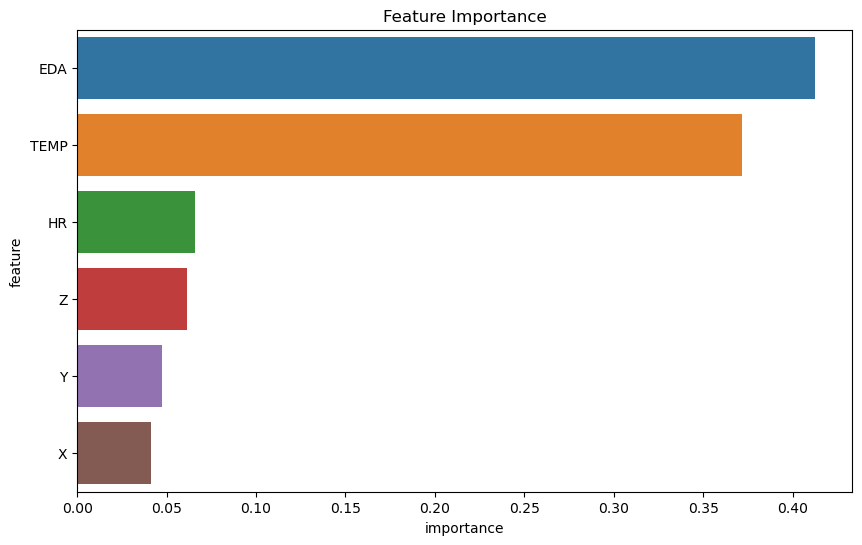

In [119]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(20), x = 'importance', y = 'feature');

### Based on top two features Box Plot 

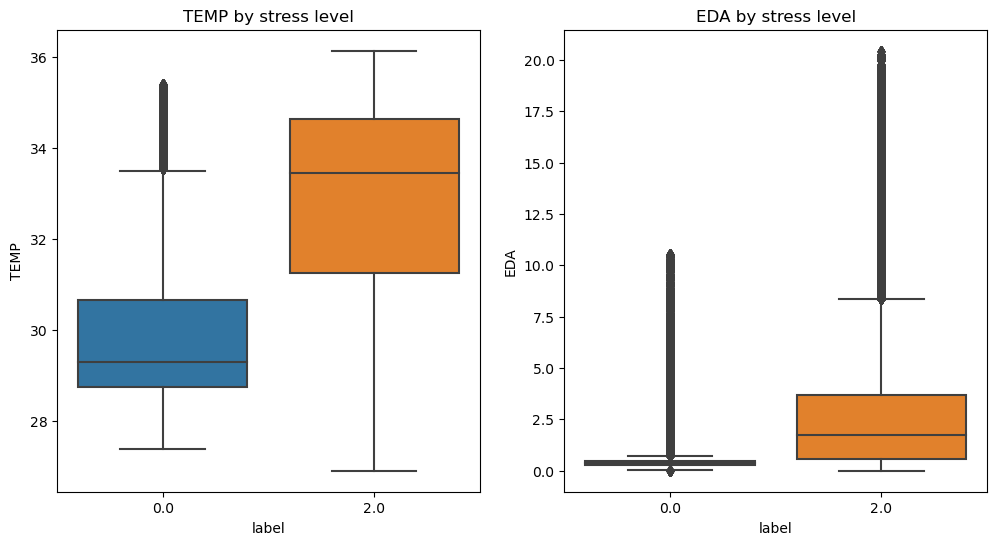

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(x='label', y='TEMP', data=nurse_train, ax=ax1)
ax1.set_title('TEMP by stress level')
sns.boxplot(x='label', y='EDA', data=nurse_train, ax=ax2)
ax2.set_title('EDA by stress level')
plt.show()